## K-Mean Clustring

Sales order : revenue + average discount <br>
End customer: revenue + average discount

### Per Sales Order - Revenue + Average Discount 

In [1]:
import pandas as pd
order = pd.read_csv('z-SalesOrder_Kcluster_Input_8-17-2021.csv')
order.head(2)

,Sales Order Number,End_Customer_Revenue_original,Average_Discount_Per_Order,End_Customer_Revenue
0,107451,253640,0.45,0.005286
1,115174,12784764,0.50,0.266551


In [2]:
df1 = order[['End_Customer_Revenue','Average_Discount_Per_Order']]
df1.head(2)

,End_Customer_Revenue,Average_Discount_Per_Order
0,0.005286,0.45
1,0.266551,0.50


In [3]:
df1.End_Customer_Revenue.isna().sum()

0

In [4]:
df1[df1.End_Customer_Revenue.isna() == True]

,End_Customer_Revenue,Average_Discount_Per_Order


#### find the best number of cluster

In [5]:
# find the best number of cluster
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(df1)
    kmeanModel.fit(df1)
 
    distortions.append(sum(np.min(cdist(df1, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / df1.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(df1, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / df1.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [6]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 0.24879262398713886
2 : 0.19149458484473839
3 : 0.14089328744416013
4 : 0.11374054128090486
5 : 0.10224994118914062
6 : 0.09717336042485467
7 : 0.08625112310181093
8 : 0.07835738320799888
9 : 0.074431922548705


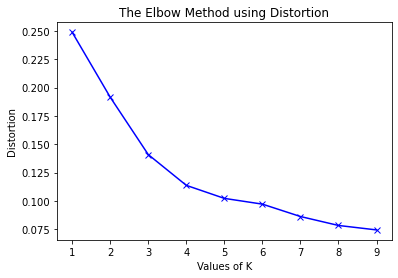

In [7]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

#### Get the labels - using k=3

In [8]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 3)
 
#predict the labels of clusters.
label3 = kmeans.fit_predict(df1)

#Getting unique labels
u_labels3 = np.unique(label3)

len(label3)

21450

<ipython-input-9-95153a771c37>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['label_k3'] = label3
No handles with labels found to put in legend.


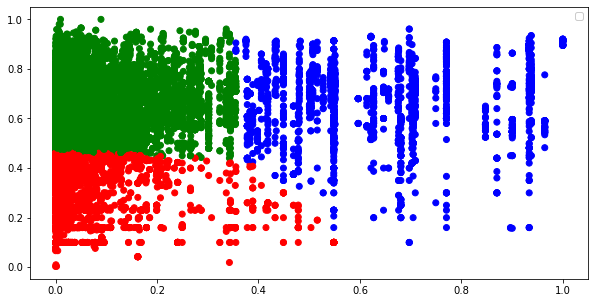

In [9]:
df1['label_k3'] = label3
plt.figure(figsize = (10,5))
colors = {0:'red', 1:'green', 2:'blue'}
plt.scatter(df1['End_Customer_Revenue'],df1['Average_Discount_Per_Order'],c=df1['label_k3'].map(colors))
plt.legend(framealpha=1, frameon=True)
plt.show()

#### Get the labels - using k=4

In [10]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 4)
 
#predict the labels of clusters.
label4 = kmeans.fit_predict(df1)

#Getting unique labels
u_labels4 = np.unique(label4)

No handles with labels found to put in legend.


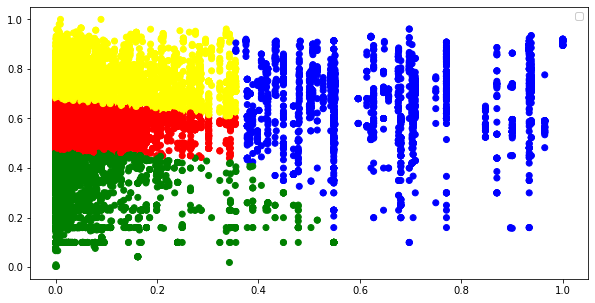

In [11]:
df1['label_k4'] = label4
plt.figure(figsize = (10,5))
colors = {0:'red', 1:'green', 2:'blue', 3:'yellow'}
plt.scatter(df1['End_Customer_Revenue'],df1['Average_Discount_Per_Order'],c=df1['label_k4'].map(colors))
plt.legend(framealpha=1, frameon=True)
plt.show()

In [12]:
kcluster_order = order[['Sales Order Number']]
kcluster_order['4Cluster_label'] = df1['label_k4']
kcluster_order.head(2)

<ipython-input-12-755dcaa95330>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kcluster_order['4Cluster_label'] = df1['label_k4']


,Sales Order Number,4Cluster_label
0,107451,1
1,115174,0


#### Get the labels - using k=5

In [13]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 5)
 
#predict the labels of clusters.
label5 = kmeans.fit_predict(df1)

#Getting unique labels
u_labels5 = np.unique(label5)

No handles with labels found to put in legend.


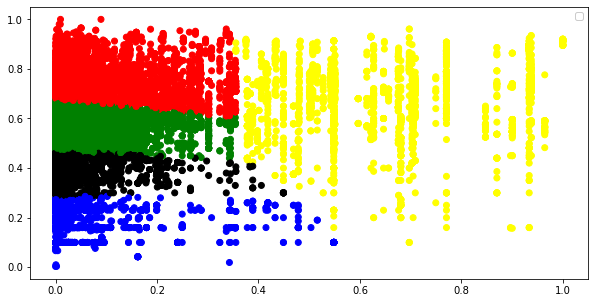

In [14]:
df1['label_k5'] = label5
plt.figure(figsize = (10,5))
colors = {0:'red', 1:'green', 2:'blue', 3:'yellow', 4:'black'}
plt.scatter(df1['End_Customer_Revenue'],df1['Average_Discount_Per_Order'],c=df1['label_k5'].map(colors))
plt.legend(framealpha=1, frameon=True)
plt.show()

In [15]:
kcluster_order['5Cluster_label'] = df1['label_k5']
kcluster_order.head(2)

<ipython-input-15-a63eff8bae9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kcluster_order['5Cluster_label'] = df1['label_k5']


,Sales Order Number,4Cluster_label,5Cluster_label
0,107451,1,4
1,115174,0,1


#### Get the labels - using k=6

In [16]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 6)
 
#predict the labels of clusters.
label6 = kmeans.fit_predict(df1)

#Getting unique labels
u_labels6 = np.unique(label6)

No handles with labels found to put in legend.


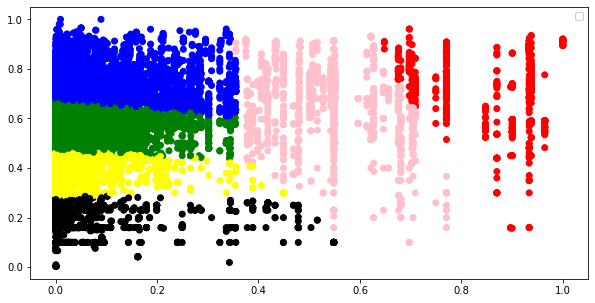

In [17]:
df1['label_k6'] = label6
plt.figure(figsize = (10,5))
colors = {0:'red', 1:'green', 2:'blue', 3:'yellow', 4:'black', 5:'pink'}
plt.scatter(df1['End_Customer_Revenue'],df1['Average_Discount_Per_Order'],c=df1['label_k6'].map(colors))
plt.legend(framealpha=1, frameon=True)
plt.show()

In [18]:
kcluster_order['6Cluster_label'] = df1['label_k6']
kcluster_order.head(2)

,Sales Order Number,4Cluster_label,5Cluster_label,6Cluster_label
0,107451,1,4,3
1,115174,0,1,1


In [19]:
kcluster_order.to_csv("z-SalesOrder_Kcluster_Result_8-17-2021.csv",index=False)

#### Get the labels - using k=7

In [73]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 7)
 
#predict the labels of clusters.
label7 = kmeans.fit_predict(df1)

#Getting unique labels
u_labels7 = np.unique(label7)

No handles with labels found to put in legend.


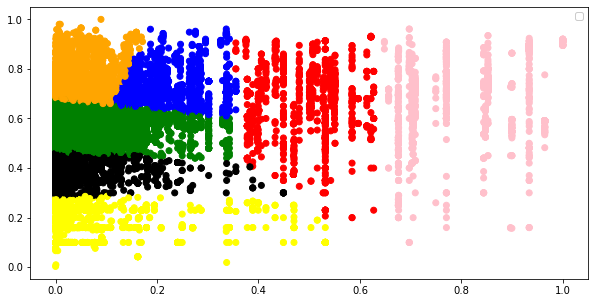

In [74]:
df1['label_k7'] = label7
plt.figure(figsize = (10,5))
colors = {0:'red', 1:'green', 2:'blue', 3:'yellow', 4:'black', 5:'pink', 6:'orange'}
plt.scatter(df1['End_Customer_Revenue'],df1['Average_Discount_Per_Order'],c=df1['label_k7'].map(colors))
plt.legend(framealpha=1, frameon=True)
plt.show()

In [154]:
#SalesOrder_Kcluster.to_csv("z-SalesOrder_Kcluster_Revenue&Continent.csv")

### Per End Customer - Revenue + Average Discount

In [1]:
import pandas as pd
endcustomer = pd.read_csv('z-EndCustomer_Kcluster_Input_8-17-2021.csv')
endcustomer.head(2)

,End Customer Parent Name,Average_Discount_End_Customer,End_Customer_Revenue-original,End_Customer_Revenue
0,1&1 Drillisch AG,0.749950,353760,0.007374
1,112 Emergency Call Center,0.784878,2461364,0.051316


In [2]:
df3 = endcustomer[['End_Customer_Revenue','Average_Discount_End_Customer']]
df3.head(2)

,End_Customer_Revenue,Average_Discount_End_Customer
0,0.007374,0.749950
1,0.051316,0.784878


In [3]:
# find the best number of cluster
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(df3)
    kmeanModel.fit(df3)
 
    distortions.append(sum(np.min(cdist(df3, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / df3.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(df3, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / df3.shape[0]
    mapping2[k] = kmeanModel.inertia_

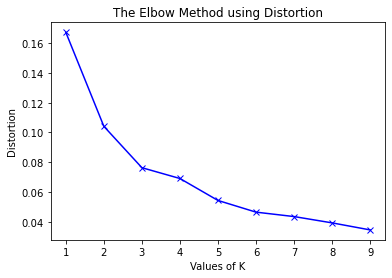

In [4]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

#### Try K=3

In [5]:
# try 3
import numpy as np
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 3)
 
#predict the labels of clusters.
label_k3 = kmeans.fit_predict(df3)

#Getting unique labels
u_labels_k3 = np.unique(label_k3)

<ipython-input-6-462e82af9a3d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['label_k3'] = label_k3
No handles with labels found to put in legend.


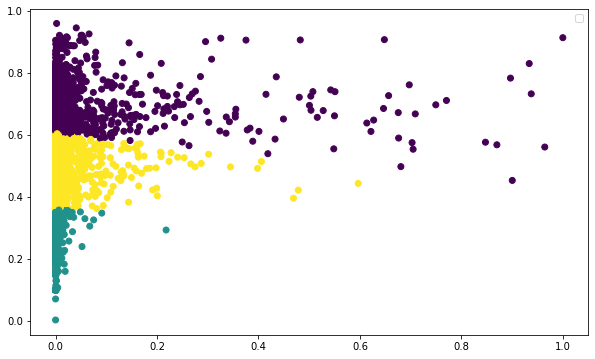

In [6]:
df3['label_k3'] = label_k3
plt.figure(figsize = (10,6))
plt.scatter(df3['End_Customer_Revenue'],df3['Average_Discount_End_Customer'],c=df3['label_k3'])
plt.legend()
plt.show()

#### Try k=4

In [7]:
# try 4
import numpy as np
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 4)
 
#predict the labels of clusters.
label_k4 = kmeans.fit_predict(df3)

#Getting unique labels
u_labels_k4 = np.unique(label_k4)

No handles with labels found to put in legend.


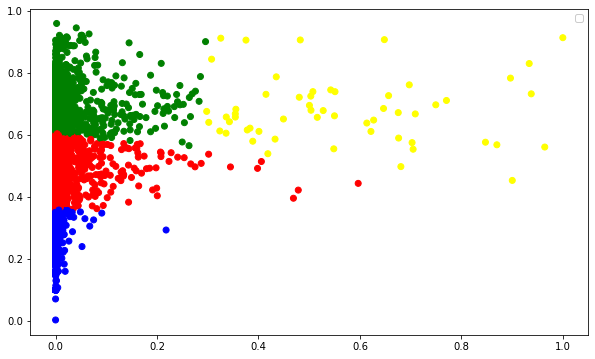

In [8]:
df3['label_k4'] = label_k4
plt.figure(figsize = (10,6))
colors = {0:'red', 1:'green', 2:'blue', 3:'yellow'}
plt.scatter(df3['End_Customer_Revenue'],df3['Average_Discount_End_Customer'],c=df3['label_k4'].map(colors))
plt.legend(framealpha=1, frameon=True)
plt.show()

#### Try K=5

In [9]:
# try 5
import numpy as np
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 5)
 
#predict the labels of clusters.
label_k5 = kmeans.fit_predict(df3)

#Getting unique labels
u_labels_k5 = np.unique(label_k5)

In [10]:
u_labels_k5

array([0, 1, 2, 3, 4])

No handles with labels found to put in legend.


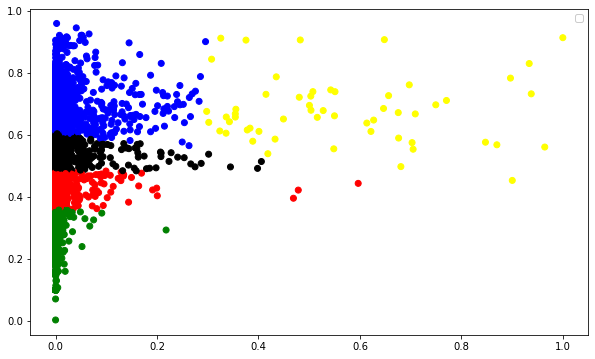

In [11]:
df3['label_k5'] = label_k5
plt.figure(figsize = (10,6))
colors = {0:'red', 1:'green', 2:'blue', 3:'yellow', 4:'black'}
plt.scatter(df3['End_Customer_Revenue'],df3['Average_Discount_End_Customer'],c=df3['label_k5'].map(colors))
plt.legend(framealpha=1, frameon=True)
plt.show()

In [44]:
len(df3)

3270

In [12]:
df3[df3.label_k5 == 4].head(2)

,End_Customer_Revenue,Average_Discount_End_Customer,label_k3,label_k4,label_k5
2,0.002311,0.581825,2,0,4
6,0.001154,0.580000,2,0,4


In [13]:
kcluster_customer = endcustomer[['End Customer Parent Name']]
kcluster_customer['5Cluster_label'] = df3['label_k5']

kcluster_customer.head(2)

<ipython-input-13-c257f4460b7c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kcluster_customer['5Cluster_label'] = df3['label_k5']


,End Customer Parent Name,5Cluster_label
0,1&1 Drillisch AG,2
1,112 Emergency Call Center,2


In [14]:
kcluster_customer.to_csv("z-EndCustomer_Kcluster_Result_8-17-2021.csv",index=False)

#### Try k=6

In [16]:
# try 6
import numpy as np
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 6)
 
#predict the labels of clusters.
label_k6 = kmeans.fit_predict(df3)

#Getting unique labels
u_labels_k6 = np.unique(label_k6)

No handles with labels found to put in legend.


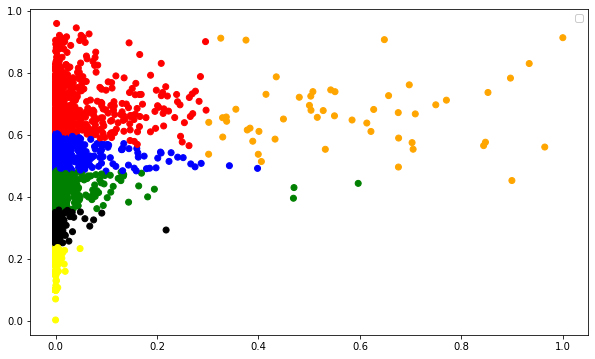

In [18]:
df3['label_k6'] = label_k6
plt.figure(figsize = (10,6))
colors = {0:'red', 1:'green', 2:'blue', 3:'yellow', 4:'black', 5:'orange'}
plt.scatter(df3['End_Customer_Revenue'],df3['Average_Discount_End_Customer'],c=df3['label_k6'].map(colors))
plt.legend(framealpha=1, frameon=True)
plt.show()

#### Try K=9

In [53]:
# try 9
import numpy as np
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 9)
 
#predict the labels of clusters.
label_k9 = kmeans.fit_predict(df3)

#Getting unique labels
u_labels_k9 = np.unique(label_k9)

<ipython-input-54-623afeb3cb4a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['label_k9'] = label_k9
No handles with labels found to put in legend.


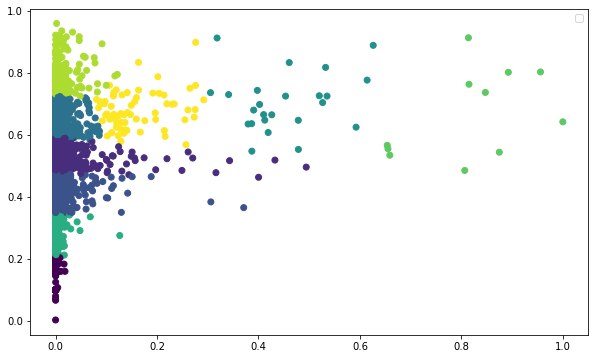

In [54]:
df3['label_k9'] = label_k9
plt.figure(figsize = (10,6))
plt.scatter(df3['End_Customer_Revenue'],df3['Average_Discount_Per_End_Customer'], c=df3['label_k9'])
plt.legend()
plt.show()

#### Slicing the data, when end customer revenue > 0.020429694

In [49]:
# 0.020429694
df4 = df3[df3['End_Customer_Revenue']>0.020429694]
df4 = df4[['End_Customer_Revenue','Average_Discount_Per_End_Customer','label_k5']]
len(df4)

420

In [50]:
df4.head(10)

,End_Customer_Revenue,Average_Discount_Per_End_Customer,label_k5
30,0.047650,0.667527,0
31,0.197415,0.487482,1
34,0.052177,0.751157,0
37,0.874772,0.544051,4
39,0.043537,0.512410,1
44,0.061287,0.714780,0
49,0.025767,0.620978,0
55,0.020777,0.883746,0
75,0.025292,0.419428,3
78,0.410178,0.665146,4


No handles with labels found to put in legend.


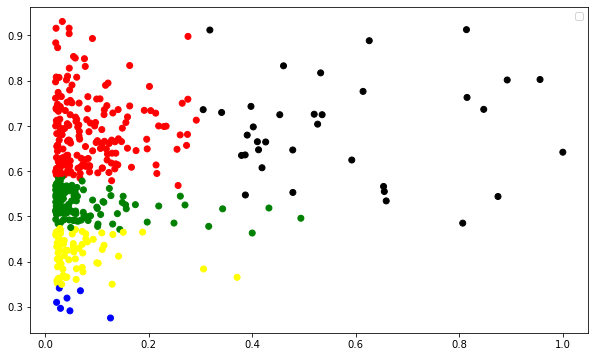

In [52]:
plt.figure(figsize = (10,6))
colors = {0:'red', 1:'green', 2:'blue', 3:'yellow', 4:'black'}
plt.scatter(df4['End_Customer_Revenue'],df4['Average_Discount_Per_End_Customer'], c=df4['label_k5'].map(colors))
plt.legend()
plt.show()